# Modelling with Logistic Regression and Random Forest Classifiers


Starting from where I last cleaned the data from Lending Club Q1 LoanStatus .csv file into a new .csv. The intention was 2-fold, firstly to increase readability of the notebook for whoever is reading this. Secondly, to separate the process flow of data cleaning, feature engineering, feature selection, modelling, conclusion and recommendations. 

Before we begin, an error metric needs to be defined to ascertain how well(or poorly) our model is performing. This is a means to our main question, using a ML model to predict the funding of a loan(or not). 

With false positives, prediction of loans that will pay on time but do not are costly to us. Whilst false negative would be loans we predicted that *won't* be  paid of but were actually paid off. This results in us losing potential to make money.


| loan_status | prediction | error type|
|---|---|---|
|0|0|True Negative|
|0|1|False Postive|
|1|0|False Negative|
|1|1|True Positive|

To make money as a conservative investor, we need to fund loans that are paid off in time to charged off loans resulting in a net-positive return. Error metric thus determine the viability of the algorithm to make or lose money.

We also need to treat false positives differently to false negatives Minimizing risk, we would want to avoid false positives as much as possible than missing out opportunities.

There is a major class imbalance of classifiers that predict loans being paid off (1) and loans that were not paid off in time (0). This can cause a issues with accuracy as a metric. Eventually we will loss money if 7 loans we fund predict a loan (1) and one is a false positive.

Accuracy would not be used as an error metric but instead the number of false negatives and false positive.

* Optimising for High Recall (TPR)
* Low Fall-out (FPR)










In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

%matplotlib inline

data = pd.read_csv("clean_2019.csv")

features = data.drop("loan_status",axis=1)
features = pd.DataFrame(features)
target = pd.Series(data["loan_status"])

## Checking for highly correlated features

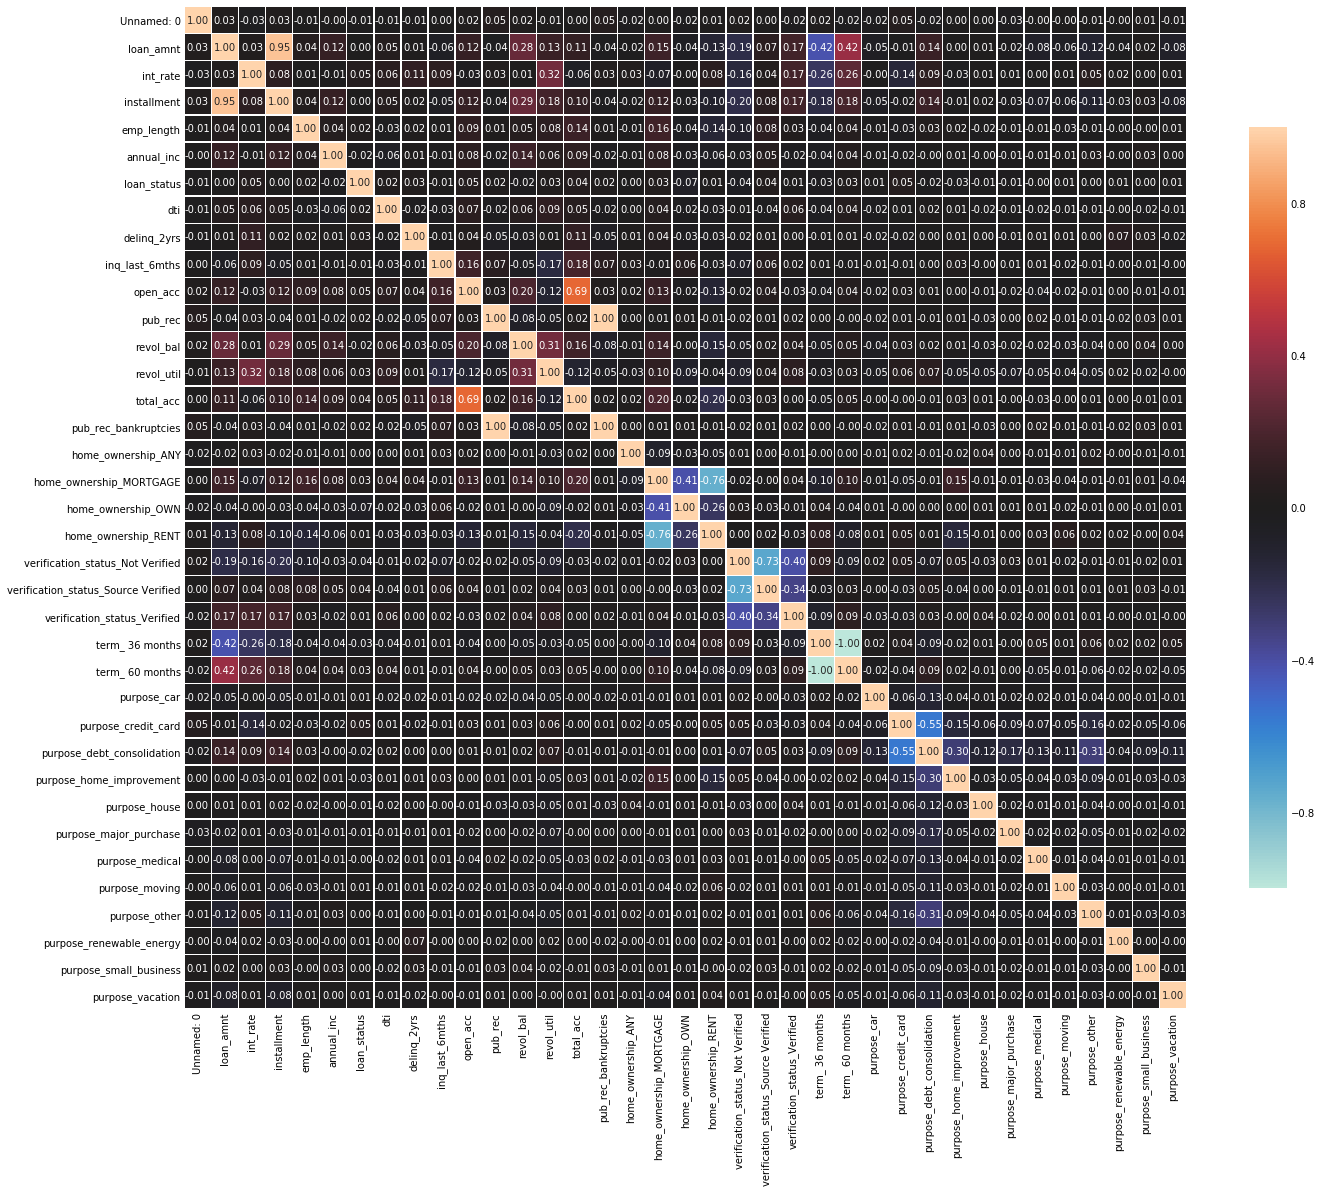

In [2]:
#Get correlational data 
data_corr = data.corr()

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data_corr, vmax=1.0, center=0, fmt='.2f',
        square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

Values near the diagonal can be ignored i.e. homeownership<>,verification_status,term_<>,purpose_<>. 0.69 correlation between open_acc and total_acc shows the relation between the number of open trades in last 6 months and total number of credit lines currently in the borrower's credit file. Perhaps the borrowers open multiple lines of credit per trade per account. Thus borrowers could be investors as well as borrowers. This is an assumption that might be of interest to explore.

# Perform Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs')
lr.fit(features,target)

predictions = lr.predict(features)

The prediction above would create a overtfit as the prediction were using the same data that the model was trained on. Thus an inaccurately high depiction of the capability of the algorithm. 

To get a more realistic depiction of model accuracy, perform k-fold cross validation.

In [14]:
from sklearn.model_selection import cross_val_predict

lr = LogisticRegression()
predictions = cross_val_predict(lr,features,target,cv=3)

pred_actu_df = pd.DataFrame()


true_negative_filter = (predictions == 0) & (data['loan_status'] == 0)
true_positive_filter = (predictions == 1) & (data['loan_status'] == 1)
false_negative_filter = (predictions == 0) & (data['loan_status'] == 1)
false_positive_filter = (predictions == 1) & (data['loan_status'] == 0)

true_negative = len(predictions[true_negative_filter])
true_positive = len(predictions[true_positive_filter])
false_negative = len(predictions[false_negative_filter])
false_positive = len(predictions[false_positive_filter])

true_positive_rate = true_positive/(true_positive + false_negative)
false_positive_rate = false_positive/(true_negative + false_positive)

print('The true positive rate is ',true_positive_rate)
print('The false positive rate is ', false_positive_rate)




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The true positive rate is  0.9995771670190274
The false positive rate is  1.0


Clearly using the wrong error metric or classifier. It isn't accounting for the imbalance in the classes.

Two ways to work around it:

* Oversample or undersample to ensure classifier gets input that has balanced class

* Tell clasifier to penalize miscalualtion of the less prevalent class more than others

Working on the first solution would require us to delete rows where loan status is 1's OR copy loan status equal 0 rows multiple times such that they equal 1s OR generate fake data to equalize the 1's and 0's.

These methods aren't particularly easy, penalizing rows would be easier to implement. 

Tweaking Logistic Regression to the parameter **balanced** when instantiating the LogisticRegression Model. Which result in more accurately classifying loan_status ***0*** This lowers the prediction of loan status ***1*** but increase accuracy of loan_status ***0*** .


###  Logistic Regression w balanced class weight

In [15]:
from sklearn.model_selection import cross_val_predict

lr = LogisticRegression(class_weight = 'balanced')
predictions = cross_val_predict(lr,features,target,cv=3)

pred_actu_df = pd.DataFrame()


true_negative_filter = (predictions == 0) & (data['loan_status'] == 0)
true_positive_filter = (predictions == 1) & (data['loan_status'] == 1)
false_negative_filter = (predictions == 0) & (data['loan_status'] == 1)
false_positive_filter = (predictions == 1) & (data['loan_status'] == 0)

true_negative = len(predictions[true_negative_filter])
true_positive = len(predictions[true_positive_filter])
false_negative = len(predictions[false_negative_filter])
false_positive = len(predictions[false_positive_filter])

true_positive_rate = true_positive/(true_positive + false_negative)
false_positive_rate = false_positive/(true_negative + false_positive)

print('The true positive rate is ',true_positive_rate)
print('The false positive rate is ', false_positive_rate)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The true positive rate is  0.6112050739957716
The false positive rate is  0.48295454545454547


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


There was a significant improvement on the false positive rate dropping from 100% to 48%. From a conservative investor standpoint, it is reassuring that the false positive rate is lower. Meaning it will do a better job at avoiding bad loans. Though we will be missing 49% of the loans that would have defaulted.

Trying instead to employ manual penalty setting to see how it would affect our results.

### Logisitic Regression w Manual Penalty 

In [22]:
from sklearn.model_selection import cross_val_predict


penalty = {
    0: 60,
    1: 1
}


lr = LogisticRegression(class_weight =penalty)
predictions = cross_val_predict(lr,features,target,cv=3)

true_negative_filter = (predictions == 0) & (data['loan_status'] == 0)
true_positive_filter = (predictions == 1) & (data['loan_status'] == 1)
false_negative_filter = (predictions == 0) & (data['loan_status'] == 1)
false_positive_filter = (predictions == 1) & (data['loan_status'] == 0)

true_negative = len(predictions[true_negative_filter])
true_positive = len(predictions[true_positive_filter])
false_negative = len(predictions[false_negative_filter])
false_positive = len(predictions[false_positive_filter])

true_positive_rate = true_positive/(true_positive + false_negative)
false_positive_rate = false_positive/(true_negative + false_positive)

print('The true positive rate is ',true_positive_rate)
print('The false positive rate is ', false_positive_rate)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The true positive rate is  0.21035940803382663
The false positive rate is  0.09659090909090909


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Dropping the false positive rate from 48% to 9% resulted in a 39% drop in false positives, however true positives took a hit, dropping to 21%.

Trying random forest instead while plugging in balanced weight to fix class imbalance in target.



In [23]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier


penalty = {
    0: 60,
    1: 1
}


rfc = RandomForestClassifier(random_state=1 ,class_weight='balanced')
predictions = cross_val_predict(rfc,features,target,cv=3)

true_negative_filter = (predictions == 0) & (data['loan_status'] == 0)
true_positive_filter = (predictions == 1) & (data['loan_status'] == 1)
false_negative_filter = (predictions == 0) & (data['loan_status'] == 1)
false_positive_filter = (predictions == 1) & (data['loan_status'] == 0)

true_negative = len(predictions[true_negative_filter])
true_positive = len(predictions[true_positive_filter])
false_negative = len(predictions[false_negative_filter])
false_positive = len(predictions[false_positive_filter])

true_positive_rate = true_positive/(true_positive + false_negative)
false_positive_rate = false_positive/(true_negative + false_positive)

print('The true positive rate using random forest classifier is  ',true_positive_rate)
print('The false positive rate using random forest classifier is ', false_positive_rate)

The true positive rate using random forest classifier is   0.9416490486257928
The false positive rate using random forest classifier is  0.7727272727272727


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Conclusion


This model did not predict our false positive rate. It was still weighing too heavily on **1** and prediciting 1's.

The best model had a false positive of 7% with a true positive of 20%.  To the conservative investor, taking on high interest investments can offest the losses from the 7% defaulting. Randomly picking loans to fund would have resulted in a default rate of 14.5%.


### Recommendations:

To improve on our returns, the following can be done:

* We can tweak the penalties further
* Try different models to random forest or logistic regression
* Use discard columns to generate better features
* Ensemble multilpe models to get better accurate predictions
* Tune the parameters of the algorithm to achieve better performance